<h1>Estudo de caso: Enem 2014 [Adaptado da versão de 2017]</h1>

<b>Problema: </b> Você é cientista de dados do Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome e precisa fazer uma análise técnica da inclusão social na educação. Para isso sua ideia foi analisar variáveis e indicadores dos conjuntos de dados abertos da educação. A primeira análise será feita no conjunto de dados do Enem 2014.

Baixar arquivo em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

<b>Estratégia:</b> Dentre os arquivos baixados, você encontrará o dicionário de dados. Este arquivo explica quais as variáveis e valores que estas podem assumir. Sua estratégia é começar com uma análise univariada das variáveis interessantes para o tema da pesquisa. Em seguida, serão escolhidos indicadores para avaliar cada um das variáveis de interesse. A imagem abaixo resume a estratégia de uma forma visual:

<img src="assets/tema_eda.png">

O conjunto de dados do Enem 2014 é muito grande e devemos nos atentar ao tentar fazer a leitura de tal conjunto pelos métodos tradicionais. É preciso usar estratégias de gerenciamento de memória para execução do trabalho.

In [8]:
# Bibliotecas para o estudo
import pandas as pd # estrutura de dados
import matplotlib.pyplot as plt # análise por gráficos
import seaborn as sns # análise por gráficos

<h1>Análise univariada das variáveis de interesse</h1>

## Variável COR/RACA

In [18]:
path = 'assets/microdados_enem_2014/DADOS/MICRODADOS_ENEM_2014.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_COR_RACA'] # IMPORTANTE: ler só a coluna TP_COR_RACA
)
df.info() # irá mostrar o uso da memória

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722248 entries, 0 to 8722247
Data columns (total 1 columns):
 #   Column       Dtype
---  ------       -----
 0   TP_COR_RACA  int64
dtypes: int64(1)
memory usage: 66.5 MB


In [20]:
df_temp = df['TP_COR_RACA'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
})
df_temp

TP_COR_RACA
Parda            0.451397
Branca           0.377065
Preta            0.127722
Amarela          0.021548
Não declarado    0.015987
Indígena         0.006281
Name: proportion, dtype: float64

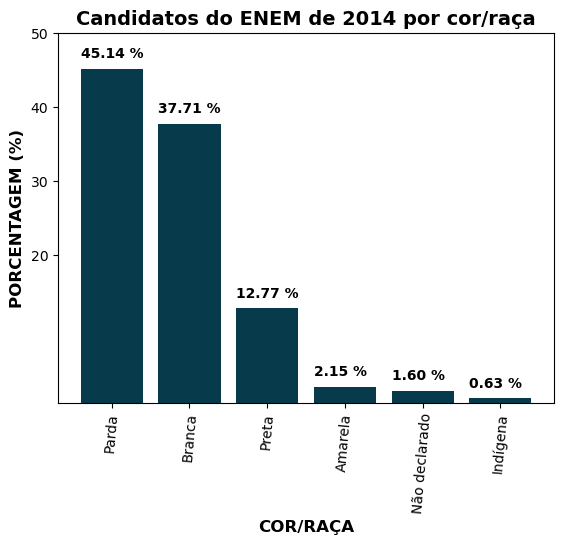

In [22]:
# Fazer gráfico completo de barras de inscritos por cor/raça

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2014 por cor/raça", # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "COR/RAÇA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+1))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.02,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold'                          # fonte em negrito
    )

# Mostrando o gráfico
plt.show()

<h1>Variável SEXO</h1>

In [24]:
path = 'assets/microdados_enem_2014/DADOS/MICRODADOS_ENEM_2014.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_SEXO'] # IMPORTANTE: ler só a coluna TP_SEXO
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722248 entries, 0 to 8722247
Data columns (total 1 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   TP_SEXO  object
dtypes: object(1)
memory usage: 66.5+ MB


In [26]:
df_temp = df['TP_SEXO'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    "F": "Feminino",
    "M": "Masculino",
})
df_temp

TP_SEXO
Feminino     0.581216
Masculino    0.418784
Name: proportion, dtype: float64

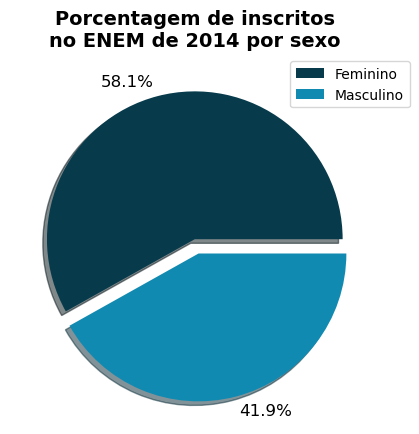

In [28]:
# Fazer gráfico completo de pizza de inscritos por sexo

## Valores (x) para o gráfico
x = df_temp.values

## Criando o gráfico com mais propriedades
plt.pie(x,                                            # Valores
    labels=["{:.1f}%".format(100*x[0]),               # Rótulo do 1º setor
            "{:.1f}%".format(100*x[1])],              # Rótulo do 2º setor
    colors=["#073B4C", "#118AB2"],                    # Cores respectivas dos setores
    shadow=True,                                      # Sombra no gráfico
    explode=[0,0.1],                                  # Destacando o 2º setor
    textprops={                                       # Propriedades do texto dos rótulos
        "fontsize":12                                 # Fonte de tamanho 12
    }
)

## Propriedades gerais

## Título
plt.title(
    "Porcentagem de inscritos\nno ENEM de 2014 por sexo", # Texto
    fontsize=14,                                          # Fonte de tamanho 14
    fontweight='bold'                                     # Fonte em negrito
)
## Legenda
plt.legend(
    df_temp.index,                                     # Texto
    bbox_to_anchor=(0.6, 0, 0.5, 1),                   # Posição da legenda
    prop={                                             # Outras propriedades 
        "size": 'medium',                              # Fonte de tamanho médio
    }
)

## Mostrando o gráfico
plt.show()

<h1>Variável Q003 (Renda familiar)</h1>

In [39]:
path = 'assets/microdados_enem_2014/DADOS/MICRODADOS_ENEM_2014.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['Q003']        # IMPORTANTE: ler só a coluna Q003
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722248 entries, 0 to 8722247
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Q003    object
dtypes: object(1)
memory usage: 66.5+ MB


In [41]:
print(df["Q003"].unique())

['E' 'C' 'K' 'F' 'H' 'B' 'I' 'D' 'J' 'G' 'A' 'N' 'O' 'P' 'M' 'Q' 'L']


In [43]:
# Análise da distribuição de renda no ENEM 2014 (Q003)
df_temp = df["Q003"].value_counts(normalize=True).sort_index()

# Mapeamento oficial do ENEM 2014 (baseado no dicionário)
renda_map_2014 = {
    "A": "Nenhuma renda.",
    "B": "Até R$ 724,00 (1 salário mínimo).",
    "C": "De R$ 724,01 até R$ 1.086,00 (1,5 salários mínimos).",
    "D": "De R$ 1.086,01 até R$ 1.448,00 (2 salários mínimos).",
    "E": "De R$ 1.448,01 até R$ 1.810,00 (2,5 salários mínimos).",
    "F": "De R$ 1.810,01 até R$ 2.172,00 (3 salários mínimos).",
    "G": "De R$ 2.172,01 até R$ 2.896,00 (4 salários mínimos).",
    "H": "De R$ 2.896,01 até R$ 3.620,00 (5 salários mínimos).",
    "I": "De R$ 3.620,01 até R$ 4.344,00 (6 salários mínimos).",
    "J": "De R$ 4.344,01 até R$ 5.068,00 (7 salários mínimos).",
    "K": "De R$ 5.068,01 até R$ 5.792,00 (8 salários mínimos).",
    "L": "De R$ 5.792,01 até R$ 6.516,00 (9 salários mínimos).",
    "M": "De R$ 6.516,01 até R$ 7.240,00 (10 salários mínimos).",
    "N": "De R$ 7.240,01 até R$ 8.688,00 (12 salários mínimos).",
    "O": "De R$ 8.688,01 até R$ 10.860,00 (15 salários mínimos).",
    "P": "De R$ 10.860,01 até R$ 14.480,00 (20 salários mínimos).",
    "Q": "Mais de R$ 14.480,01 (acima de 20 salários mínimos)."
}

# Aplicar o mapeamento e reindexar
df_temp.index = df_temp.index.map(renda_map_2014)
df_temp = df_temp.reindex(renda_map_2014.values())

# Exibir resultados
print(df_temp)

Q003
Nenhuma renda.                                             0.021963
Até R$ 724,00 (1 salário mínimo).                          0.313732
De R$ 724,01 até R$ 1.086,00 (1,5 salários mínimos).       0.222550
De R$ 1.086,01 até R$ 1.448,00 (2 salários mínimos).       0.128130
De R$ 1.448,01 até R$ 1.810,00 (2,5 salários mínimos).     0.072998
De R$ 1.810,01 até R$ 2.172,00 (3 salários mínimos).       0.062756
De R$ 2.172,01 até R$ 2.896,00 (4 salários mínimos).       0.049697
De R$ 2.896,01 até R$ 3.620,00 (5 salários mínimos).       0.037736
De R$ 3.620,01 até R$ 4.344,00 (6 salários mínimos).       0.024256
De R$ 4.344,01 até R$ 5.068,00 (7 salários mínimos).       0.015830
De R$ 5.068,01 até R$ 5.792,00 (8 salários mínimos).       0.008288
De R$ 5.792,01 até R$ 6.516,00 (9 salários mínimos).       0.007310
De R$ 6.516,01 até R$ 7.240,00 (10 salários mínimos).      0.006933
De R$ 7.240,01 até R$ 8.688,00 (12 salários mínimos).      0.006900
De R$ 8.688,01 até R$ 10.860,00 (15 salário

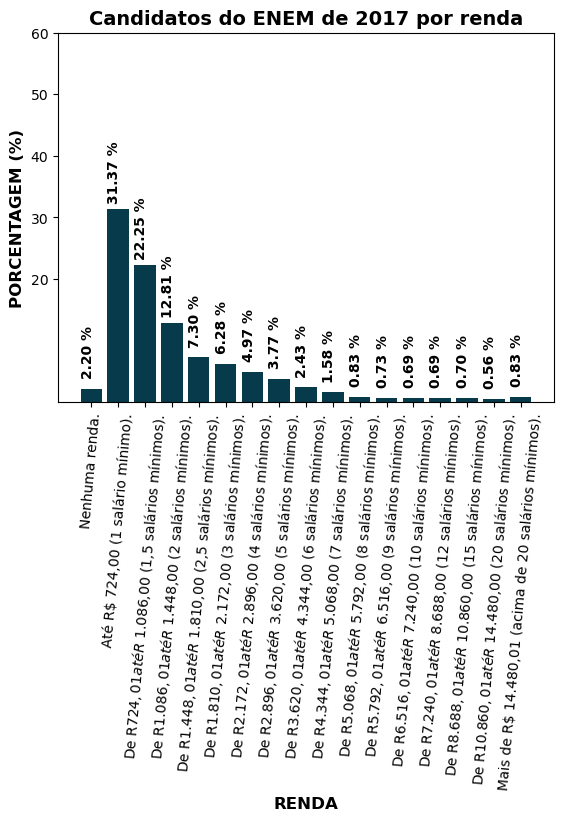

In [51]:
# Fazer gráfico completo de barras de inscritos por renda

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2017 por renda",    # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "RENDA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+3))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.06,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold',                         # fonte em negrito
        rotation=90
    )

# Mostrando o gráfico
plt.show()

<h1>Variável TP_IDADE</h1>

In [55]:
path = 'assets/microdados_enem_2014/DADOS/MICRODADOS_ENEM_2014.csv'
df = pd.read_csv(
    path,                   # caminho do arquivo a ser lido 
    encoding='iso-8859-1',  # codificação dos caracteres 
    sep=';',                # separador de colunas
    usecols=['TP_FAIXA_ETARIA']
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722248 entries, 0 to 8722247
Data columns (total 1 columns):
 #   Column           Dtype
---  ------           -----
 0   TP_FAIXA_ETARIA  int64
dtypes: int64(1)
memory usage: 66.5 MB


In [57]:
df_temp = df["TP_FAIXA_ETARIA"].value_counts(normalize=True)
idade_map = {
    1: "Menor de 17 anos",
    2: "17 anos",
    3: "18 anos",
    4: "19 anos",
    5: "20 anos",
    6: "21 anos",
    7: "22 anos",
    8: "23 anos",
    9: "24 anos",
    10: "25 anos",
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}
df_temp.index = df_temp.index.map(idade_map)
df_temp = df_temp.reindex(idade_map.values())
df_temp

TP_FAIXA_ETARIA
Menor de 17 anos      0.094624
17 anos               0.131695
18 anos               0.122617
19 anos               0.093015
20 anos               0.073056
21 anos               0.058570
22 anos               0.047377
23 anos               0.040261
24 anos               0.033969
25 anos               0.031009
Entre 26 e 30 anos    0.110318
Entre 31 e 35 anos    0.067385
Entre 36 e 40 anos    0.040954
Entre 41 e 45 anos    0.025953
Entre 46 e 50 anos    0.016192
Entre 51 e 55 anos    0.008206
Entre 56 e 60 anos    0.003380
Entre 61 e 65 anos    0.001032
Entre 66 e 70 anos    0.000288
Maior de 70 anos      0.000099
Name: proportion, dtype: float64

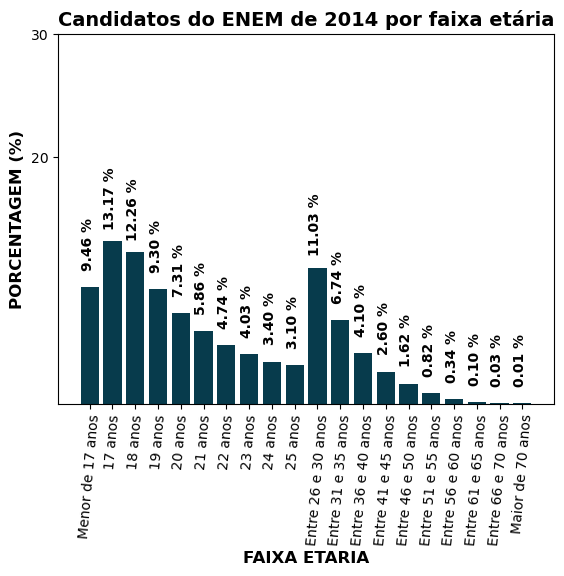

In [59]:
# Fazer gráfico completo de barras de inscritos por renda

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar(x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2014 por faixa etária",    # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "FAIXA ETARIA",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+2))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, cor_raca in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[cor_raca] + 0.035,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[cor_raca]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold',                         # fonte em negrito
        rotation=90
    )

# Mostrando o gráfico
plt.show()

<h1>Análise bivariada</h1>

In [65]:
path = 'assets/microdados_enem_2014/DADOS/MICRODADOS_ENEM_2014.csv'
df = pd.read_csv(
    path, # caminho do arquivo a ser lido 
    encoding='iso-8859-1', # codificação dos caracteres 
    sep=';', # separador de colunas
    usecols=[
        'TP_FAIXA_ETARIA', 'Q003', 'TP_SEXO',  'TP_COR_RACA',
        'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8722248 entries, 0 to 8722247
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   TP_FAIXA_ETARIA  int64  
 1   TP_SEXO          object 
 2   TP_COR_RACA      int64  
 3   NU_NOTA_CN       float64
 4   NU_NOTA_CH       float64
 5   NU_NOTA_LC       float64
 6   NU_NOTA_MT       float64
 7   NU_NOTA_REDACAO  int64  
 8   Q003             object 
dtypes: float64(4), int64(3), object(2)
memory usage: 598.9+ MB


In [67]:
# Criar a coluna de nota final fazendo a média das notas em cada competência mais a redação
df['NOTA_FINAL'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + \
                   df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + \
                   + df['NU_NOTA_REDACAO'] ) / 5

In [69]:
# Considerar apenas linhas onde a nota não seja nula
df = df[df['NOTA_FINAL'].notna()]

## Nota média por Faixa etária

In [72]:
# remover warning
pd.options.mode.chained_assignment = None

# Filtrar com apenas faixas etárias não agrupadas
df_temp = df[(df['TP_FAIXA_ETARIA']<=10) & (df['TP_FAIXA_ETARIA']>=2)]

# Converter categoria numérica para categoria textual
df_temp['TP_FAIXA_ETARIA'] = df_temp['TP_FAIXA_ETARIA'].map(lambda x: x + 15)
df_temp['TP_FAIXA_ETARIA'].value_counts()

TP_FAIXA_ETARIA
17    994058
18    851207
19    585031
20    426389
21    323184
22    250560
23    206396
24    169142
25    150708
Name: count, dtype: int64

In [74]:
# Agrupar as notas por idade e agregar pela média
df_group = df_temp.groupby('TP_FAIXA_ETARIA').agg({"NOTA_FINAL": 'mean'})
df_group

,NOTA_FINAL
TP_FAIXA_ETARIA,
17,510.451172
18,504.484125
19,497.220731
20,493.812520
21,492.490442
22,493.162637
23,494.623450
24,494.791712
25,494.278094


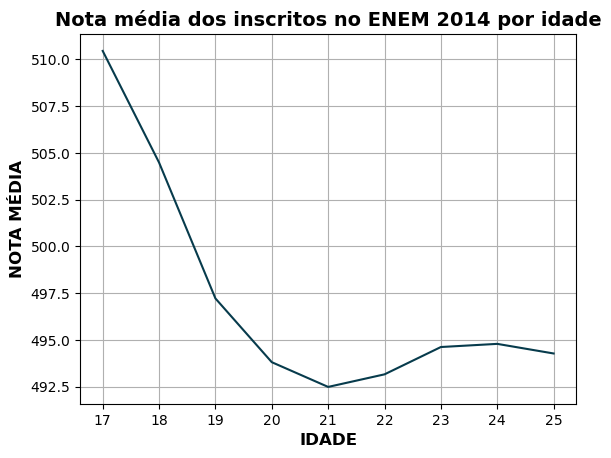

In [76]:
# Definindo x e y
x = df_group['NOTA_FINAL'].index
y = df_group['NOTA_FINAL'].values

# Criando o gráfico
plt.plot(x, y,
    color="#073b4c", # Cor
)

# Propriedades gerais

## Título
plt.title(
    "Nota média dos inscritos no ENEM 2014 por idade", # Texto
    fontsize=14,                                       # Fonte de tamanho 14
    fontweight='bold'                                  # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "IDADE",                       # Texto
    fontsize=12,                   # Fonte de tamanho 12
    fontweight='bold'              # Fonte em negrito 
)

## Rótulo do eixo vertical
plt.ylabel(
    "NOTA MÉDIA",                 # Texto
    fontsize=12,                  # Fonte de tamanho 12
    fontweight='bold'             # Fonte em negrito
)

## Grade
plt.grid('on')

## Nota por renda familiar

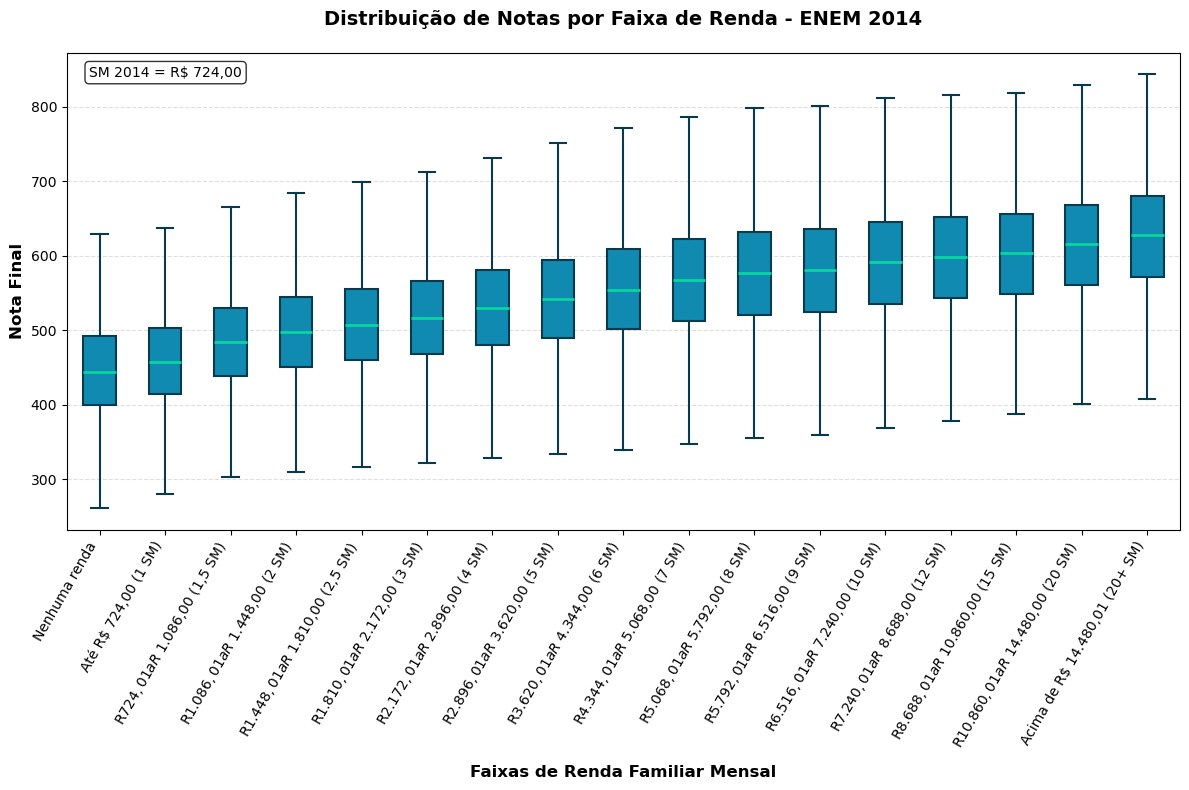

In [80]:
# Dados para o boxplot (filtrando valores NaN)
xs = []
for letter in sorted(df['Q003'].dropna().unique()):
    xs.append(df[df['Q003'] == letter]['NOTA_FINAL'].dropna().values)

# Mapeamento das faixas de renda do ENEM 2014
renda_labels_2014 = [
    'Nenhuma renda',
    'Até R$ 724,00 (1 SM)',
    'R$ 724,01 a R$ 1.086,00 (1,5 SM)',
    'R$ 1.086,01 a R$ 1.448,00 (2 SM)',
    'R$ 1.448,01 a R$ 1.810,00 (2,5 SM)',
    'R$ 1.810,01 a R$ 2.172,00 (3 SM)',
    'R$ 2.172,01 a R$ 2.896,00 (4 SM)',
    'R$ 2.896,01 a R$ 3.620,00 (5 SM)',
    'R$ 3.620,01 a R$ 4.344,00 (6 SM)',
    'R$ 4.344,01 a R$ 5.068,00 (7 SM)',
    'R$ 5.068,01 a R$ 5.792,00 (8 SM)',
    'R$ 5.792,01 a R$ 6.516,00 (9 SM)',
    'R$ 6.516,01 a R$ 7.240,00 (10 SM)',
    'R$ 7.240,01 a R$ 8.688,00 (12 SM)',
    'R$ 8.688,01 a R$ 10.860,00 (15 SM)',
    'R$ 10.860,01 a R$ 14.480,00 (20 SM)',
    'Acima de R$ 14.480,01 (20+ SM)'
]

# Paleta de cores moderna
box_colors = ['#118AB2']  # Cor principal
median_colors = ['#06D6A0']  # Cor da mediana

# Criando o gráfico
plt.figure(figsize=(12, 8))
box = plt.boxplot(xs,
    patch_artist=True,
    boxprops=dict(facecolor=box_colors[0], color='#073B4C', linewidth=1.5),
    whiskerprops=dict(color='#073B4C', linewidth=1.5),
    capprops=dict(color='#073B4C', linewidth=1.5),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='#118AB2', markeredgecolor='#073B4C', alpha=0.5),
    medianprops=dict(color=median_colors[0], linewidth=2),
    showfliers=False  # Removi outliers para melhor visualização
)

# Estilização
plt.title('Distribuição de Notas por Faixa de Renda - ENEM 2014',
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Faixas de Renda Familiar Mensal', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Nota Final', fontsize=12, fontweight='bold')

# Ajustes dos eixos
plt.xticks(range(1, len(renda_labels_2014)+1), renda_labels_2014, 
          rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Melhorando a legibilidade
plt.tight_layout()

# Adicionando informação sobre salário mínimo (SM)
plt.annotate('SM 2014 = R$ 724,00', 
             xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

## Nota por sexo

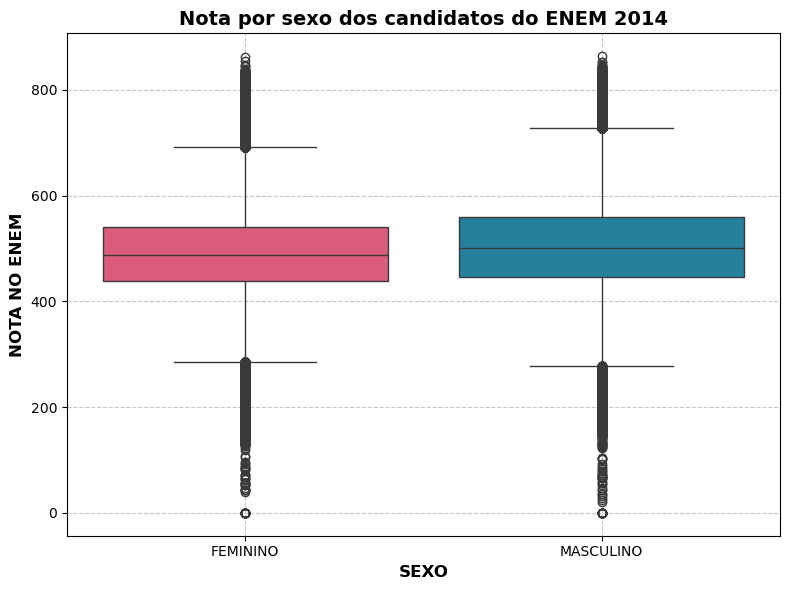

In [85]:
plt.figure(figsize=(8, 6))

# Gráfico corrigido
sns.boxplot(
    data=df, 
    x="TP_SEXO",
    y="NOTA_FINAL", 
    hue="TP_SEXO",  # Adicionado para corrigir o warning
    palette=['#EF476F', '#118AB2'],
    legend=False    # Remove a legenda redundante
)

# Mantendo suas propriedades visuais originais
plt.title(
    "Nota por sexo dos candidatos do ENEM 2014",
    fontsize=14,
    fontweight='bold'
)
plt.xlabel(
    "SEXO",
    fontsize=12,
    fontweight='bold'    
)
plt.xticks([0, 1], ['FEMININO', 'MASCULINO'])
plt.ylabel(
    "NOTA NO ENEM",
    fontsize=12,
    fontweight='bold'    
)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [87]:
df['TP_COR_RACA'] = df['TP_COR_RACA'].map({
    0: "Não declarado",
    1: "Branca",
    2: "Preta",
    3: "Parda",
    4: "Amarela",
    5: "Indígena",
})

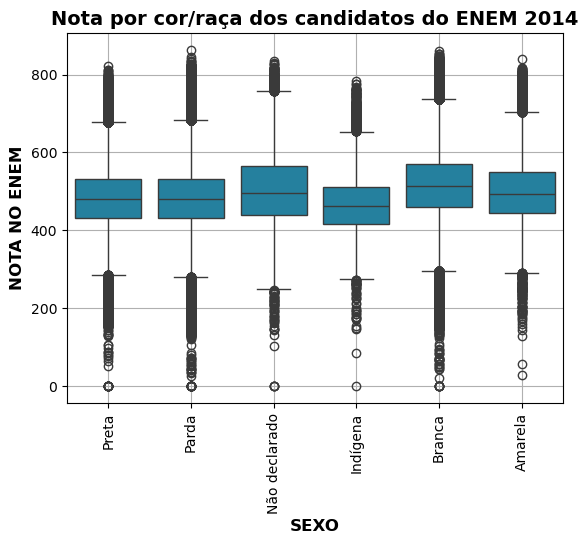

In [89]:
my_order = df.groupby(by=["TP_COR_RACA"])["NOTA_FINAL"].median().iloc[::-1].index

sns.boxplot(
    data=df,
    color="#118AB2",
    x="TP_COR_RACA",
    order=my_order,
    y="NOTA_FINAL")

# Propriedades gerais
## Título
plt.title(
    "Nota por cor/raça dos candidatos do ENEM 2014", # texto
    fontsize=14, # tamanho da font
    fontweight='bold' # colocando em negrito
)
## Rótulo do eixo horizontal
plt.xlabel(
    "SEXO", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)
plt.xticks(rotation=90)
## Rótulo do eixo vertical
plt.ylabel(
    "NOTA NO ENEM", # texto
    fontsize=12, # tamanho da font
    fontweight='bold' # colocando em negrito    
)

plt.grid('on')

plt.show()

In [91]:
from IPython.display import Image, HTML, display

img_A = 'assets/dashboardp1.png'
img_B = 'assets/dashboardp2.png'

display(HTML("<table><tr><td><img src={0}></td><td><img src={1}></td></tr></table>".format(img_A,img_B)))

,
